In [16]:
#importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
from nolearn.dbn import DBN
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
%matplotlib inline

In [18]:
#importing files in pandas dataframe
train = pd.read_csv('train.csv',header=0)
trainOrig = train
test = pd.read_csv('test.csv',header = 0)
testOrig = test
labels = train['label']
labelsOrig = labels
train.drop('label',axis=1, inplace =True)
#test shape =(28000,784), train shape =(42000,784), labels shape = (42000,1)

In [19]:
#Converting dataframes into numpy arrays
train = train.as_matrix()
test = test.as_matrix()
labels = labels.as_matrix()

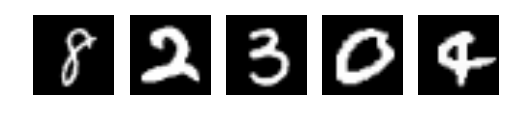

Labels: [8, 2, 3, 0, 4]


In [20]:
#Visualization of few random hand written digits
fig = plt.figure()
randLabels = []
for i in range(1,6):
    k = random.randrange(0,42000,10)
    ax = fig.add_subplot(1,5,i)
    ax.imshow(train[k,:].reshape(28,28),'gray')
    ax.axis('off')
    randLabels.append(labels[k])
plt.show()
print('Labels: {}'.format(randLabels))

In [21]:
#PreProcessing(Data Compression)
pca = PCA()
pca.fit(train)
VarianceRatio = pca.explained_variance_ratio_

In [22]:
#Finding number of principal components
#Retaining 85% of total variance 
TotVar = 0 
for idx, Var in enumerate(VarianceRatio):
    TotVar += Var 
    if(TotVar>=0.85): 
        break 
print('Total Retained Variance: {}'.format(TotVar)) 
print('Number of principal components {}'.format(idx))

Total Retained Variance: 0.850864180465
Number of principal components 58


In [23]:
#Again fitting pca for 42 principal components
pcaRed = PCA(n_components = 58,whiten= True)
pcaRed.fit(train)
#Compressing training and testing data using fitted data
train = pcaRed.transform(train)
test = pcaRed.transform(test)

In [24]:
#Cross-validation split
(trainX, validX, trainY, validY) = train_test_split(train,labels, test_size = 0.2)

In [26]:
#Classifier and fitting
dbn = DBN([trainX.shape[1], 1500, 10],learn_rates = 0.2,learn_rate_decays = 0.9,epochs = 50,verbose = 1)
dbn.fit(trainX,trainY)

[DBN] fitting X.shape=(33600L, 58L)
[DBN] layers [58L, 1500, 10]
[DBN] Fine-tune...


100%


Epoch 1:
  loss 0.36610254754
  err  0.0862202380952
  (0:00:12)


100%


Epoch 2:
  loss 0.26058643008
  err  0.0473511904762
  (0:00:11)


100%


Epoch 3:
  loss 0.170603738061
  err  0.0324107142857
  (0:00:12)


100%


Epoch 4:
  loss 0.0912478148879
  err  0.0191666666667
  (0:00:13)


100%


Epoch 5:
  loss 0.0409577513417
  err  0.0103273809524
  (0:00:13)


100%


Epoch 6:
  loss 0.0166479471414
  err  0.005
  (0:00:13)


100%


Epoch 7:
  loss 0.00731493160669
  err  0.00178571428571
  (0:00:12)


100%


Epoch 8:
  loss 0.00405505766626
  err  0.000535714285714
  (0:00:13)


100%


Epoch 9:
  loss 0.00302509656689
  err  0.000119047619048
  (0:00:12)


100%


Epoch 10:
  loss 0.00323447311685
  err  2.97619047619e-05
  (0:00:12)


100%


Epoch 11:
  loss 0.00329589706823
  err  2.97619047619e-05
  (0:00:12)


100%


Epoch 12:
  loss 0.00349230771175
  err  0.0
  (0:00:11)


100%


Epoch 13:
  loss 0.0038010897774
  err  2.97619047619e-05
  (0:00:09)


100%


Epoch 14:
  loss 0.00390722181631
  err  0.0
  (0:00:12)


100%


Epoch 15:
  loss 0.00402144156297
  err  0.0
  (0:00:12)


100%


Epoch 16:
  loss 0.00405529588139
  err  0.0
  (0:00:11)


100%


Epoch 17:
  loss 0.00397076289558
  err  0.0
  (0:00:12)


100%


Epoch 18:
  loss 0.00422890721222
  err  0.0
  (0:00:12)


100%


Epoch 19:
  loss 0.00433377834924
  err  0.0
  (0:00:10)


100%


Epoch 20:
  loss 0.00426927764257
  err  0.0
  (0:00:08)


100%


Epoch 21:
  loss 0.00442712637751
  err  0.0
  (0:00:09)


100%


Epoch 22:
  loss 0.00433737985513
  err  0.0
  (0:00:08)


100%


Epoch 23:
  loss 0.0043608739624
  err  0.0
  (0:00:13)


100%


Epoch 24:
  loss 0.00442233181226
  err  0.0
  (0:00:10)


100%


Epoch 25:
  loss 0.00449930976333
  err  0.0
  (0:00:05)


100%


Epoch 26:
  loss 0.00460852765434
  err  0.0
  (0:00:05)


100%


Epoch 27:
  loss 0.00458993938463
  err  0.0
  (0:00:05)


100%


Epoch 28:
  loss 0.00463059988571
  err  0.0
  (0:00:05)


100%


Epoch 29:
  loss 0.00436799625777
  err  0.0
  (0:00:05)


100%


Epoch 30:
  loss 0.00448930435348
  err  0.0
  (0:00:05)


100%


Epoch 31:
  loss 0.00448646302291
  err  0.0
  (0:00:13)


100%


Epoch 32:
  loss 0.00462155815192
  err  0.0
  (0:00:09)


100%


Epoch 33:
  loss 0.00457270346582
  err  0.0
  (0:00:06)


100%


Epoch 34:
  loss 0.00450315290308
  err  0.0
  (0:00:05)


100%


Epoch 35:
  loss 0.00451299171584
  err  0.0
  (0:00:10)


100%


Epoch 36:
  loss 0.00456378242389
  err  0.0
  (0:00:11)


100%


Epoch 37:
  loss 0.00462951855911
  err  0.0
  (0:00:11)


100%


Epoch 38:
  loss 0.00458745105037
  err  0.0
  (0:00:11)


100%


Epoch 39:
  loss 0.00439842069499
  err  0.0
  (0:00:11)


100%


Epoch 40:
  loss 0.00454760473177
  err  0.0
  (0:00:11)


100%


Epoch 41:
  loss 0.00463129176082
  err  0.0
  (0:00:13)


100%


Epoch 42:
  loss 0.00459141219301
  err  0.0
  (0:00:07)


100%


Epoch 43:
  loss 0.00450209136875
  err  0.0
  (0:00:06)


100%


Epoch 44:
  loss 0.00446494851661
  err  0.0
  (0:00:06)


100%


Epoch 45:
  loss 0.00461255649326
  err  0.0
  (0:00:05)


100%


Epoch 46:
  loss 0.00463907881396
  err  0.0
  (0:00:09)


100%


Epoch 47:
  loss 0.00458191232379
  err  0.0
  (0:00:12)


100%


Epoch 48:
  loss 0.00462221446691
  err  0.0
  (0:00:12)


100%


Epoch 49:
  loss 0.00457777323977
  err  0.0
  (0:00:11)


100%


Epoch 50:
  loss 0.00445755852209
  err  0.0
  (0:00:12)


In [27]:
#cross validation report
predsValid = dbn.predict(validX)
predsTrain = dbn.predict(trainX)
print (classification_report(validY, predsValid))
print('The training accuracy is:', accuracy_score(trainY, predsTrain))
print ('The cross-validation accuracy is:', accuracy_score(validY, predsValid))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       800
          1       0.99      0.99      0.99       946
          2       0.98      0.98      0.98       881
          3       0.98      0.97      0.98       894
          4       0.98      0.98      0.98       805
          5       0.98      0.98      0.98       714
          6       0.98      0.98      0.98       849
          7       0.99      0.98      0.98       900
          8       0.98      0.98      0.98       801
          9       0.97      0.97      0.97       810

avg / total       0.98      0.98      0.98      8400

('The training accuracy is:', 1.0)
('The cross-validation accuracy is:', 0.98071428571428576)


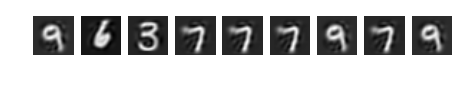

Predicted Labels: [9, 6, 3, 7, 7, 7, 9, 7, 9]
Original Labels: [9, 6, 3, 7, 7, 7, 9, 7, 9]


In [34]:
#Visualization of few random hand written digits from cross validation set
fig = plt.figure()
LabelsPred = []
LabelsOrig = []
for i in range(1,10):
    k = random.randrange(0,validX.shape[1],10)
    ax = fig.add_subplot(1,10,i)
    ax.imshow(pcaRed.inverse_transform(validX[k,:]).reshape(28,28),'gray')
    ax.axis('off')
    LabelsPred.append(predsValid[k])
    LabelsOrig.append(validY[k])
plt.show()
print('Predicted Labels: {}'.format(LabelsPred))
print('Original Labels: {}'.format(LabelsOrig))

In [35]:
#using classifier to predict test images on public leader board
pred = dbn.predict(test)
dfPred = pd.read_csv('sample_submission.csv',header=0)
dfPred['Label']= pd.DataFrame(pred)
dfPred.to_csv('mySubmission.csv', index=False)
#98.143% LeaderBoard Accuracy